In [1]:
%matplotlib widget

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
from prophet import prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

ImportError: cannot import name 'prophet' from 'prophet' (C:\Users\AledoHouse\anaconda3\Lib\site-packages\prophet\__init__.py)

In [180]:
df = pd.read_csv("./US_youtube_trending_data.csv")


In [ ]:
### Stephen

In [ ]:
### Validate Dataset by testing and EDA

In [230]:
# Orginal dataframe number of rows and columns

df.shape


(48361, 16)

In [231]:
# Orginal dataframe indexs

df.columns


Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [232]:
# Orginal dataframe highest view counts

df['view_count'].sort_values(ascending= False)

266187    1407643634
152788     277791741
56374      264407389
3358       232649205
73564      206202284
             ...    
143804             0
19027              0
201188             0
48995              0
80754              0
Name: view_count, Length: 48361, dtype: int64

In [233]:
# Orginal dataframe highest likes

df['likes'].sort_values(ascending= False)

56374     16021534
3358      15735533
152788    12993894
68979     12117314
4980      11795670
            ...   
226749           0
13525            0
98789            0
233767           0
80754            0
Name: likes, Length: 48361, dtype: int64

In [234]:
# Filter orginal dataframe line items by highest view count for each similiar row.
# Drop duplicates with lower view count value

df_sorted_view = df.sort_values(by=['view_count'], ascending=[False])

unique_videos_view = df_sorted_view.drop_duplicates(subset='title', keep='first')


In [235]:
# New dataframe to be used moving forward which has duplicates removed

unique_videos_view

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,04-01-2024,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,04-03-2024,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,08-19-2022,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,09-10-2022,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,05-21-2021,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,05-30-2021,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,08-21-2020,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,08-28-2020,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,07-03-2021,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,08-08-2021,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143804,j-_LHVn6RHE,Celebrating Steelpan,07-25-2022,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,07-28-2022,[None],0,0,0,0,https://i.ytimg.com/vi/j-_LHVn6RHE/default.jpg,True,True,NaN
19027,AWXvClaRtsI,Celebrating Maria Tallchief,11-14-2020,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,11-16-2020,[None],0,0,0,0,https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...
201188,LHCTW4pckDo,Live at the Met Gala With Vogue,05-02-2023,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,26,05-10-2023,vogue|met gala|emma chamberlain|metgala23-live...,0,97565,0,1931,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos..."
48995,mCY4b6GGkb4,The Funeral of The Duke of Edinburgh,04-17-2021,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,04-18-2021,[None],0,0,0,0,https://i.ytimg.com/vi/mCY4b6GGkb4/default.jpg,True,True,The Funeral procession and service for His Roy...


In [236]:
# Validate new dataframe by comparing to orginal

In [237]:
# New dataframe number of rows and columns
# Orginal = (267987, 16)

print("Shape of Orginal DF", df.shape)

print("Shape of New DF", unique_videos_view.shape)

Shape of Orginal DF (48361, 16)
Shape of New DF (48361, 16)


In [238]:
# New dataframe indexs
# Orginal = identical

print("Columns for Orginal DF:")
print(df.columns)

print("\nColumns for New DF:")
print(unique_videos_view.columns)

Columns for Orginal DF:
Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

Columns for New DF:
Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [239]:
# New dataframe highest view counts

print("Highest viewcounts for New DF:")
print(unique_videos_view['view_count'].sort_values(ascending=False))

Highest viewcounts for New DF:
266187    1407643634
152788     277791741
56374      264407389
3358       232649205
73564      206202284
             ...    
65504              0
65528              0
74492              0
104508             0
80754              0
Name: view_count, Length: 48361, dtype: int64


In [240]:
# New dataframe highest likes

print("Highest likes for New DF:")
unique_videos_view['likes'].sort_values(ascending=False)

Highest likes for New DF:


56374     16021534
3358      15735533
152788    12993894
68979     12117314
4980      11795670
            ...   
226749           0
13525            0
98789            0
233767           0
80754            0
Name: likes, Length: 48361, dtype: int64

In [278]:
# Change New DF to df for ease moving forward with filtered dataset

unique_videos_view = df


In [263]:
# 

In [264]:
# Variable Index items are "publishedAt", "trending_date", "view_count", "likes", "dislikes", "comment_count".
# These values will change based on User Engagment.
# Index items that will not change based of user engagment.

fixed_index = ['video_id', 'title', 'channelId', 'channelTitle', 'categoryId', 
                      'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

df_fixed_index = df.sort_values(by='view_count', ascending=False)[fixed_index]

df_fixed_index


,video_id,title,channelId,channelTitle,categoryId,tags,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,[None],https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,[None],https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...
143804,j-_LHVn6RHE,Celebrating Steelpan,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,[None],https://i.ytimg.com/vi/j-_LHVn6RHE/default.jpg,True,True,NaN
19027,AWXvClaRtsI,Celebrating Maria Tallchief,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,[None],https://i.ytimg.com/vi/AWXvClaRtsI/default.jpg,True,True,In honor of Native American Heritage Month in ...
201188,LHCTW4pckDo,Live at the Met Gala With Vogue,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,26,vogue|met gala|emma chamberlain|metgala23-live...,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos..."
48995,mCY4b6GGkb4,The Funeral of The Duke of Edinburgh,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,[None],https://i.ytimg.com/vi/mCY4b6GGkb4/default.jpg,True,True,The Funeral procession and service for His Roy...


In [265]:
# Format 'publishedAt' and 'trending_date' to datetime. (mm-dd-yyyy)

#df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.strftime('%m-%d-%Y')

#df['trending_date'] = pd.to_datetime(df['trending_date']).dt.strftime('%m-%d-%Y')

In [266]:
# Index items that will  change based of user engagment are Variable Index items
# Variable Index items are "publishedAt", "trending_date", "view_count", "likes", "dislikes", "comment_count".

variable_index = ['publishedAt', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']

df_variable_index = df.sort_values(by='view_count', ascending=False)[variable_index]

df_variable_index

,publishedAt,trending_date,view_count,likes,dislikes,comment_count
266187,04-01-2024,04-03-2024,1407643634,126926,0,13987
152788,08-19-2022,09-10-2022,277791741,12993894,0,3534337
56374,05-21-2021,05-30-2021,264407389,16021534,150989,6738537
3358,08-21-2020,08-28-2020,232649205,15735533,714194,6065230
73564,07-03-2021,08-08-2021,206202284,6840430,240769,2826
...,...,...,...,...,...,...
143804,07-25-2022,07-28-2022,0,0,0,0
19027,11-14-2020,11-16-2020,0,0,0,0
201188,05-02-2023,05-10-2023,0,97565,0,1931
48995,04-17-2021,04-18-2021,0,0,0,0


In [267]:
# Filter line items by highest view count for each similiar row.

columns_to_display = ['publishedAt', 'title', 'channelId', 'channelTitle', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']

view_count_df = df.sort_values(by='view_count', ascending=False)[columns_to_display]

view_count_df


,publishedAt,title,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count
266187,04-01-2024,Discord Loot Boxes are here.,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,04-03-2024,1407643634,126926,0,13987
152788,08-19-2022,BLACKPINK - ‘Pink Venom’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,09-10-2022,277791741,12993894,0,3534337
56374,05-21-2021,BTS (방탄소년단) 'Butter' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,05-30-2021,264407389,16021534,150989,6738537
3358,08-21-2020,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,08-28-2020,232649205,15735533,714194,6065230
73564,07-03-2021,Turn into orbeez - Tutorial #Shorts,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,08-08-2021,206202284,6840430,240769,2826
...,...,...,...,...,...,...,...,...,...
143804,07-25-2022,Celebrating Steelpan,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,07-28-2022,0,0,0,0
19027,11-14-2020,Celebrating Maria Tallchief,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,11-16-2020,0,0,0,0
201188,05-02-2023,Live at the Met Gala With Vogue,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,05-10-2023,0,97565,0,1931
48995,04-17-2021,The Funeral of The Duke of Edinburgh,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,04-18-2021,0,0,0,0


In [268]:
# Highest view count lineitem info.

highest_view_count_title = "Discord Loot Boxes are here."

hvc_title = df[df['title'] == highest_view_count_title]

hvc_title


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,04-01-2024,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,04-03-2024,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...


In [269]:
hvc_title_sorted = hvc_title.sort_values(by='view_count', ascending=False)

selected_columns = ['title', 'publishedAt', 'channelTitle', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']

result = hvc_title_sorted[selected_columns]

result

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count
266187,Discord Loot Boxes are here.,04-01-2024,Discord,04-03-2024,1407643634,126926,0,13987


In [338]:
# How many times does the highest viewcount line item appear in the data set?

highest_view_count_title = "Discord Loot Boxes are here."

title_count = (df['title'] == highest_view_count_title).sum()

print("The title '{}' appears {} times in the dataset.".format(highest_view_count_title, title_count))

The title 'Discord Loot Boxes are here.' appears 1 times in the dataset.


In [271]:
# Most recent published video = 04/10/2024
# First published videos = 08/03/2020

unique_videos_view['publishedAt'] = pd.to_datetime(unique_videos_view['publishedAt'])

df_range = unique_videos_view.sort_values(by='publishedAt', ascending=False)[columns_to_display]

df_range

,publishedAt,title,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count
267787,2024-04-10,Joker: Folie à Deux | Official Teaser Trailer,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,04-11-2024,13797158,545476,0,27112
267805,2024-04-10,USWNT vs. Canada HIGHLIGHTS | 2024 SheBelieves...,UCk1pcWQ5E19g0Cgp4c1eI1w,U.S. Soccer,04-11-2024,100795,980,0,219
267799,2024-04-10,The 2025 Toyota 4Runner is HERE! First look,UCfzWwxboCLyLw7KVfQj84eA,Extra Throttle House,04-11-2024,301062,12391,0,899
267802,2024-04-10,Conan O’Brien Makes His Tonight Show Return an...,UC8-Th83bH_thdKZDJCrn88g,The Tonight Show Starring Jimmy Fallon,04-11-2024,574662,14046,0,1298
267835,2024-04-10,JOKER 2 TRAILER REACTION! Joker: Folie à Deux ...,UC7_WiJnJxpm4MRNesRttzWg,Reel Rejects,04-11-2024,161194,8932,0,558
...,...,...,...,...,...,...,...,...,...
197,2020-08-05,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,08-12-2020,1120675,41671,888,5282
198,2020-08-05,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,08-12-2020,1123529,39289,2056,3626
183,2020-08-05,This is Goodbye,UCIcgBZ9hEJxHv6r_jDYOMqg,Unus Annus,08-12-2020,4971181,360168,7850,48742
180,2020-08-05,Explained: What happened in deadly Beirut expl...,UCoMdktPbSTixAyNGwb-UYkQ,Sky News,08-12-2020,8496552,74508,3034,11855


In [ ]:
###########################

In [272]:
### Do videos with disabled comments and ratings tend to have different engagement levels?
# likes, dislikes, view_count

In [353]:
# Videos with disabled comments or ratings

disabled_videos = unique_videos_view[(unique_videos_view['comments_disabled'] == True) | (unique_videos_view['ratings_disabled'] == True)]

disabled_videos.shape


(831, 16)

In [354]:
# Calculate total values for videos with disabled engagement

disabled_engagement = df[df['ratings_disabled'] | df['comments_disabled']]
total_disabled_likes = disabled_engagement['likes'].sum()
total_disabled_dislikes = disabled_engagement['dislikes'].sum()
total_disabled_views = disabled_engagement['view_count'].sum()

In [355]:
# Display the results

print("Total engagement values for all videos with disabled engagement:")
print("Likes: ", total_disabled_likes)
print("Dislikes: ", total_disabled_dislikes)
print("View count: ", total_disabled_views)

Total engagement values for all videos with disabled engagement:
Likes:  29907630
Dislikes:  1127112
View count:  2527188037


In [356]:
# Number of videos without enabled engagement

num_disabled_videos = len(disabled_engagement)

num_disabled_videos

831

In [317]:
# Average engagment values per video without enabled engagement

average_disabled_likes = round(total_disabled_likes / num_disabled_videos)
average_disabled_dislikes = round(total_disabled_dislikes / num_disabled_videos)
average_disabled_views = round(total_disabled_views / num_disabled_videos)


In [325]:
# Print the average engagment per video

print("\nAverage values per video without enabled engagement:")
print("Likes: ", average_disabled_likes)
print("Dislikes: ", average_disabled_dislikes)
print("View count: ", average_disabled_views)


Average values per video without enabled engagement:
Likes:  35990
Dislikes:  1356
View count:  3041141


In [ ]:
########################

In [319]:
# Videos with enabled engagement

enabled_videos = df[(df['comments_disabled'] == False) & (df['ratings_disabled'] == False)]

enabled_videos.shape


(47530, 16)

In [329]:
# Calculate total values for videos with enabled engagement

enabled_engagement = df[~(df['ratings_disabled'] | df['comments_disabled'])]
total_enabled_likes = enabled_engagement['likes'].sum()
total_enabled_dislikes = enabled_engagement['dislikes'].sum()
total_enabled_views = enabled_engagement['view_count'].sum()


In [330]:
# Display the results

print("\nVideos with enabled engagement total values:")
print("Likes: ", total_enabled_likes)
print("Dislikes: ", total_enabled_dislikes)
print("View count: ", total_enabled_views)


Videos with enabled engagement total values:
Likes:  5703923345
Dislikes:  55705004
View count:  125160599560


In [331]:
# Number of videos with enabled engagement

num_enabled_videos = len(enabled_engagement)

num_enabled_videos

47530

In [332]:
# Average engagment values per video with enabled engagement

average_enabled_likes = round(total_enabled_likes / num_enabled_videos)
average_enabled_dislikes = round(total_enabled_dislikes / num_enabled_videos)
average_enabled_views = round(total_enabled_views / num_enabled_videos)


In [333]:
# Print the average engagment per video

print("\nAverage values per video with enabled engagement:")
print("Likes: ", average_enabled_likes)
print("Dislikes: ", average_enabled_dislikes)
print("View count: ", average_enabled_views)


Average values per video with enabled engagement:
Likes:  120007
Dislikes:  1172
View count:  2633297


In [363]:
# Compare Views
views = [average_enabled_views, average_disabled_views]

view_titles = ['enabled_views', 'disabled_views']

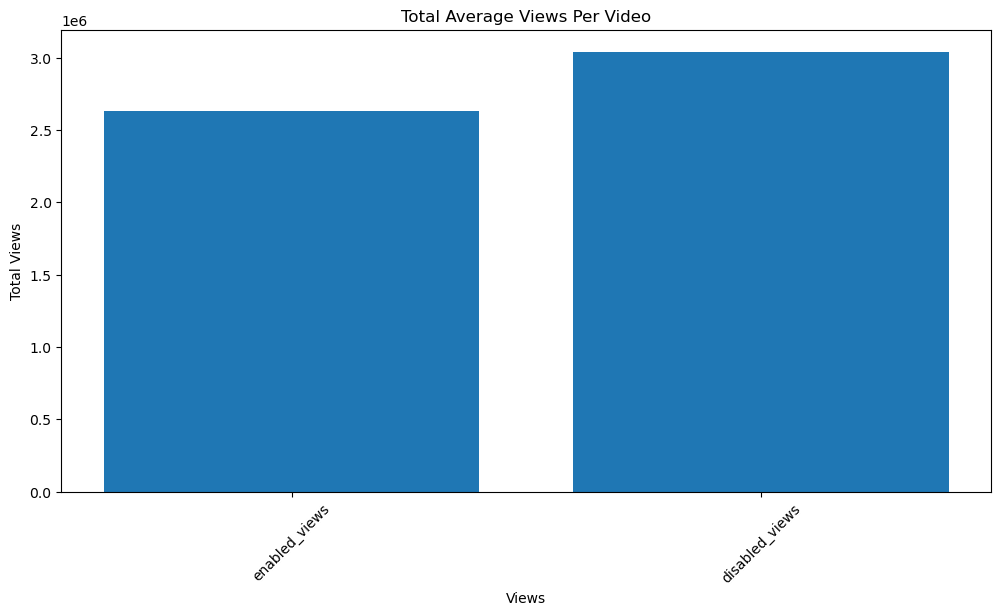

In [366]:
# Visual comparison
# Average engagement for disabled vs enabled videos

plt.figure(figsize=(12, 6))
plt.bar(x= view_titles, height = views)
plt.title('Total Average Views Per Video')
plt.xlabel('Engagment')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### How do ratings-disabled or comments-disabled videos perform compared to others?

In [352]:


df_sorted_dislikes = df.sort_values(by='dislikes', ascending=False)



In [ ]:
### How does the performance of videos in different categories compare in terms of views, likes, and comments?

In [ ]:
### Are there any notable differences in engagement metrics between videos with and without tags?